In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

df=pd.read_csv("water_treatment_data.csv")

backup = df.copy() #Always backup your data!

## Exploratory Analysis

In [5]:
df.head() #Preview

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,?,228,70.2,5.5,2120,7.9,?,280,94,72.3,0.3,2010,7.3,?,84,21,81.0,0.02,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,?,244,75.4,7.7,2570,7.6,?,474,96,79.2,0.4,2700,7.5,?,91,17,94.1,0.00,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,?,220,72.7,4.5,1594,7.7,?,272,92,78.3,0.2,1742,7.6,?,128,21,81,0.05,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,236,268,73.1,8.5,2280,7.8,158,376,96,77.1,0.4,2060,7.6,20,104,20,96.7,0.00,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,?,236,57.6,4.5,2020,7.8,?,372,88,68.2,0.2,2250,7.6,19,108,22,65.9,0.02,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [6]:
df.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


Don't really like the column names, not descriptive at first glance. Also, Why did it drop so many columns?

In [7]:
df.info()

#This explains why .describe dropped so many columns. Several columns should be floats or integers instead of objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
Date        527 non-null object
Q-E         527 non-null object
ZN-E        527 non-null object
PH-E        527 non-null float64
DBO-E       527 non-null object
DQO-E       527 non-null object
SS-E        527 non-null object
SSV-E       527 non-null object
SED-E       527 non-null object
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       527 non-null object
SS-P        527 non-null int64
SSV-P       527 non-null object
SED-P       527 non-null object
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       527 non-null object
DQO-D       527 non-null object
SS-D        527 non-null object
SSV-D       527 non-null object
SED-D       527 non-null object
COND-D      527 non-null int64
PH-S        527 non-null object
DBO-S       527 non-null object
DQO-S       527 non-null object
SS-S        527 non-null object
SSV-S       527 non-null object


In [8]:
df.describe(include=['object'])

,Date,Q-E,ZN-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,DBO-P,SSV-P,SED-P,DBO-D,DQO-D,SS-D,SSV-D,SED-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
unique,527,504,173,205,289,142,275,60,226,285,64,149,230,75,243,23,16,44,137,58,194,18,413,315,308,144,185,265,156,231,183,43
top,D-31/5/91,?,1.00,?,380,172,?,4.5,?,?,4.0,?,?,86,?,0.2,7.7,15,?,14,80.0,0.00,1399,?,50.0,?,?,?,?,?,91.8,100
freq,1,18,39,23,7,14,11,63,40,11,44,28,9,26,13,159,134,43,18,38,23,172,4,62,12,27,40,26,36,25,11,193


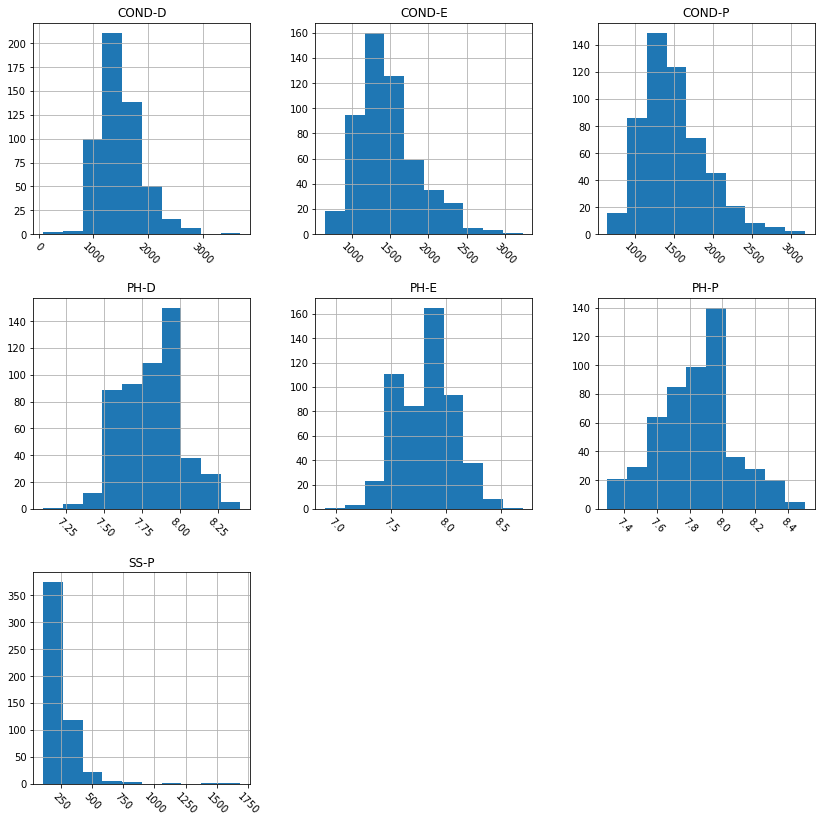

In [9]:
#First look as histograms
df.hist(xrot=-45, figsize=(14,14))

plt.show()

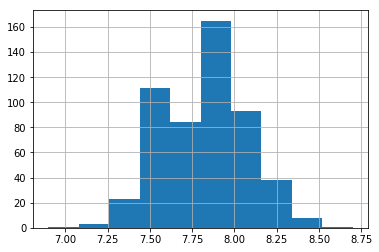

In [10]:
df['PH-E'].hist(bins=10)
plt.show()
#just look at PH-E for now since it's the first column that contains floats

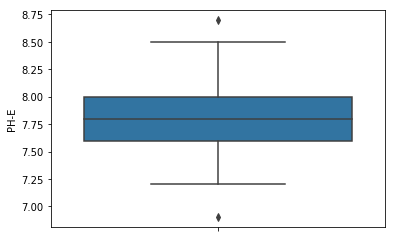

In [11]:
sns.boxplot(y='PH-E', data=df)
plt.show()

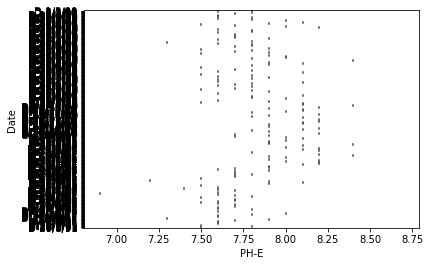

In [12]:
sns.violinplot(y='Date', x='PH-E', data=df)
plt.show()
#what, why won't it show?
#matplotlib.pyplot instead of just matplotlib

That was stupid to do a violin plot on pH over time

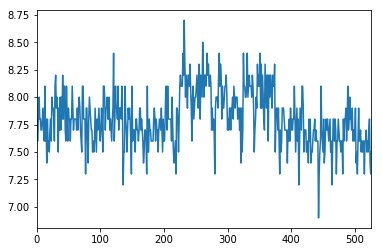

In [13]:
df['PH-E'].plot()
plt.show()

## Data Cleaning

In [14]:
#Want to change all columns containing objects into floats or int
#first need a list of all features that are labeled as objects
df_mask = df.dtypes==object
for feature in df.dtypes[df_mask].index:
    print(feature)

Date
Q-E
ZN-E
DBO-E
DQO-E
SS-E
SSV-E
SED-E
DBO-P
SSV-P
SED-P
DBO-D
DQO-D
SS-D
SSV-D
SED-D
PH-S
DBO-S
DQO-S
SS-S
SSV-S
SED-S
COND-S
RD-DBO-P
RD-SS-P
RD-SED-P
RD-DBO-S
RD-DQO-S
RD-DBO-G
RD-DQO-G
RD-SS-G
RD-SED-G


In [15]:
print(df.Date.min())
print(df.Date.max())

D-1/1/90
D-9/9/90


In [16]:
#Date should stay as it is

In [17]:
#Group columns that should be ints
int_groups=['Q-E', 'DBO-E', 'DQO-E', 'SS-E', 'DBO-P', 'DBO-D', 'DQO-D', 'SS-D', 'DBO-S', 'DQO-S', 'SS-S', 'COND-S']
#Group columns that should be floats
float_groups=['ZN-E', 'SSV-E', 'SED-D', 'SSV-P', 'SED-P', 'SSV-D', 'SED-D', 'PH-S', 'SSV-S', 'SED-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

This was entirely unnecessary

In [18]:
#df['Q-E'] = pd.to_numeric(df['Q-E'], errors='coerce') #If able to do it for one column, can figure out how to loop it

In [25]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    if feature != 'Date':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
Date        527 non-null object
Q-E         509 non-null float64
ZN-E        524 non-null float64
PH-E        527 non-null float64
DBO-E       504 non-null float64
DQO-E       521 non-null float64
SS-E        526 non-null float64
SSV-E       516 non-null float64
SED-E       502 non-null float64
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       487 non-null float64
SS-P        527 non-null int64
SSV-P       516 non-null float64
SED-P       503 non-null float64
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       499 non-null float64
DQO-D       518 non-null float64
SS-D        525 non-null float64
SSV-D       514 non-null float64
SED-D       502 non-null float64
COND-D      527 non-null int64
PH-S        526 non-null float64
DBO-S       504 non-null float64
DQO-S       509 non-null float64
SS-S        522 non-null float64
SSV-S       5

In [ ]:
#Looks like it was successful. Yay!

In [27]:
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,487.000000,527.000000,516.000000,503.000000,527.000000,527.000000,499.000000,518.000000,525.000000,514.000000,502.000000,527.000000,526.000000,504.000000,509.000000,522.000000,510.000000,499.000000,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,206.207392,253.952562,60.370349,5.033598,1496.034156,7.811954,122.348697,274.046332,94.224762,72.968482,0.416733,1490.569260,7.709886,19.988095,87.294695,22.235632,80.151765,0.037074,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,74.823304,147.458468,12.393996,3.348890,402.588656,0.199594,37.023745,74.118506,23.994333,10.471349,0.380197,399.990816,0.187355,17.589189,39.027040,16.337023,9.157038,0.196809,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,32.000000,104.000000,7.100000,1.000000,646.000000,7.100000,26.000000,80.000000,49.000000,20.200000,0.000000,85.000000,7.000000,3.000000,9.000000,6.000000,29.200000,0.000000,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,153.000000,184.000000,54.175000,3.000000,1217.000000,7.700000,97.000000,220.000000,78.000000,67.400000,0.200000,1225.500000,7.600000,14.000000,64.000000,14.000000,75.000000,0.000000,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,197.000000,220.000000,62.800000,4.500000,1420.000000,7.800000,119.000000,274.000000,90.000000,74.500000,0.300000,1428.000000,7.700000,18.000000,84.000000,19.000000,81.150000,0.010000,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,243.000000,272.000000,69.025000,6.000000,1713.500000,7.900000,148.000000,325.000000,106.000000,79.500000,0.500000,1701.000000,7.800000,23.000000,101.000000,24.000000,85.700000,0.020000,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,517.000000,1692.000000,93.500000,46.000000,3170.000000,8.400000,285.000000,511.000000,244.000000,100.000000,3.500000,3690.000000,9.700000,320.000000,350.000000,238.000000,100.000000,3.500000,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [28]:
df.describe(include=['object'])

,Date
count,527
unique,527
top,D-31/5/91
freq,1


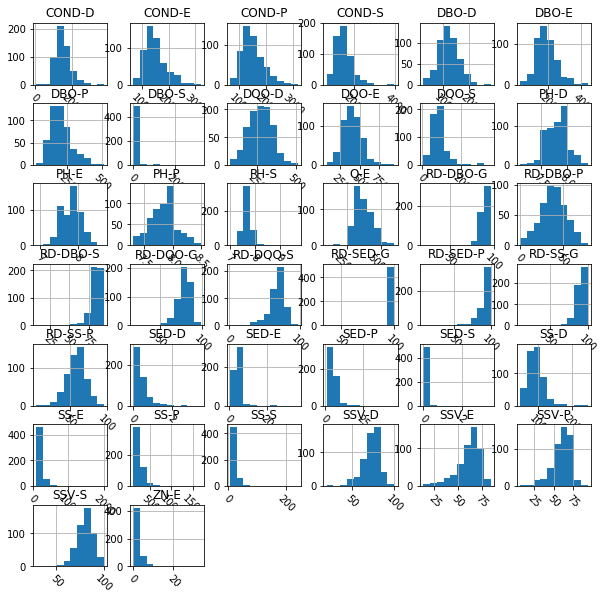

In [29]:
df.hist(xrot=-45, figsize=(10,10))

plt.show()